In [88]:
# import wget
#
# url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
# myfile = wget.download(url)

In [89]:
# import tarfile
# file = tarfile.open('food-101.tar.gz')
# file.extractall('./food-101')

In [90]:
# Get labels
import json
import os

import keras.layers.activation
from tqdm.notebook import tqdm

def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/train.json")
test_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/test.json")

In [91]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [92]:
import pathlib
import numpy as np
import tensorflow as tf
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    targe_folder = target_dir+target_class
    random_image = random.sample(os.listdir(targe_folder),1)
    img = mpimg.imread(targe_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


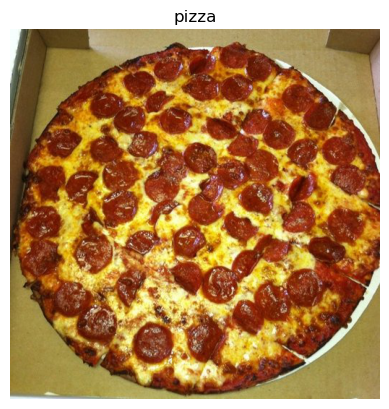

In [94]:
img = view_random_image(target_class="pizza",target_dir="pizza_steak/train/")

In [95]:

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[245, 254, 253],
        [245, 254, 253],
        [245, 254, 253],
        ...,
        [110,  83,  53],
        [112,  85,  55],
        [113,  86,  56]],

       [[245, 254, 253],
        [245, 254, 253],
        [245, 254, 253],
        ...,
        [108,  81,  51],
        [110,  83,  53],
        [111,  84,  54]],

       [[245, 254, 253],
        [245, 254, 253],
        [245, 254, 253],
        ...,
        [105,  78,  48],
        [106,  79,  49],
        [107,  80,  50]],

       ...,

       [[217, 228, 220],
        [216, 227, 221],
        [215, 226, 220],
        ...,
        [167, 143,  95],
        [167, 144,  94],
        [168, 145,  95]],

       [[227, 242, 239],
        [227, 242, 239],
        [226, 240, 240],
        ...,
        [169, 145,  97],
        [168, 144,  96],
        [169, 146,  96]],

       [[224, 240, 240],
        [224, 240, 240],
        [224, 240, 240],
        ...,
        [170, 146,  9

In [96]:
img.shape

(512, 512, 3)

In [97]:
#Normalizing data
img/255.

array([[[0.96078431, 0.99607843, 0.99215686],
        [0.96078431, 0.99607843, 0.99215686],
        [0.96078431, 0.99607843, 0.99215686],
        ...,
        [0.43137255, 0.3254902 , 0.20784314],
        [0.43921569, 0.33333333, 0.21568627],
        [0.44313725, 0.3372549 , 0.21960784]],

       [[0.96078431, 0.99607843, 0.99215686],
        [0.96078431, 0.99607843, 0.99215686],
        [0.96078431, 0.99607843, 0.99215686],
        ...,
        [0.42352941, 0.31764706, 0.2       ],
        [0.43137255, 0.3254902 , 0.20784314],
        [0.43529412, 0.32941176, 0.21176471]],

       [[0.96078431, 0.99607843, 0.99215686],
        [0.96078431, 0.99607843, 0.99215686],
        [0.96078431, 0.99607843, 0.99215686],
        ...,
        [0.41176471, 0.30588235, 0.18823529],
        [0.41568627, 0.30980392, 0.19215686],
        [0.41960784, 0.31372549, 0.19607843]],

       ...,

       [[0.85098039, 0.89411765, 0.8627451 ],
        [0.84705882, 0.89019608, 0.86666667],
        [0.84313725, 0

In [98]:
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255.)
valid_datagen=ImageDataGenerator(rescale=1./255.)

#setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = train_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [99]:
#Build a CNN model
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),])
#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 145ms/step - loss: 0.5825 - accuracy: 0.6947 - val_loss: 0.4680 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4233 - accuracy: 0.8160 - val_loss: 0.3522 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4058 - accuracy: 0.8380 - val_loss: 0.3501 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3436 - accuracy: 0.8567 - val_loss: 0.3143 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 7s 153ms/step - loss: 0.2526 - accuracy: 0.8987 - val_loss: 0.3344 - val_accuracy: 0.8600


In [100]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_54 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_56 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

In [101]:
#009 Trying a non-CNN model on our image data
#trying to fit image data in non-cnn model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),]
)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 143ms/step - loss: 0.6941 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 141ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [102]:
#010 Improving our non-CNN model by adding more layers

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"), ]
)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 153ms/step - loss: 3.4404 - accuracy: 0.6360 - val_loss: 0.5675 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 7s 156ms/step - loss: 0.7604 - accuracy: 0.6907 - val_loss: 0.5856 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.8033 - accuracy: 0.6827 - val_loss: 0.8768 - val_accuracy: 0.5880
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6867 - accuracy: 0.7160 - val_loss: 0.4949 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 8s 159ms/step - loss: 0.4682 - accuracy: 0.7753 - val_loss: 1.2323 - val_accuracy: 0.5800


Image shape: (512, 512, 3)


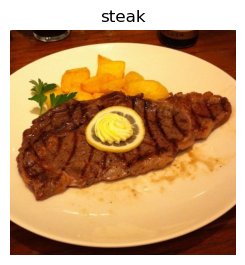

In [103]:
#011 Breaking our CNN model down part 1 Becoming one with the data
# biany classification breakdown
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")



In [104]:
#012 Breaking our CNN model down part 2 Preparing to load our data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [105]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)
#013 Breaking our CNN model down part 3 Loading our data with ImageDataGenerator
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [106]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [107]:
#Get the images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [108]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [109]:
#014 Breaking our CNN model down part 4 Building a baseline CNN model
# create a CNN model (Baseline model)
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation,Dropout
from keras import Sequential

# create the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(244,244,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



In [110]:
len(train_data),len(test_data)

(47, 16)

In [111]:
#015 Breaking our CNN model down part 5 Looking inside a Conv2D layer
#016 Breaking our CNN model down part 6 Compiling and fitting our baseline CNN
#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics = ["accuracy"])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 8s 162ms/step - loss: 2.5437 - accuracy: 0.6033 - val_loss: 0.5636 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 7s 158ms/step - loss: 0.5203 - accuracy: 0.7560 - val_loss: 0.4707 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 7s 156ms/step - loss: 0.4518 - accuracy: 0.8067 - val_loss: 0.5160 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 7s 154ms/step - loss: 0.3664 - accuracy: 0.8500 - val_loss: 0.4570 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 8s 166ms/step - loss: 0.2506 - accuracy: 0.9147 - val_loss: 0.4892 - val_accuracy: 0.7560


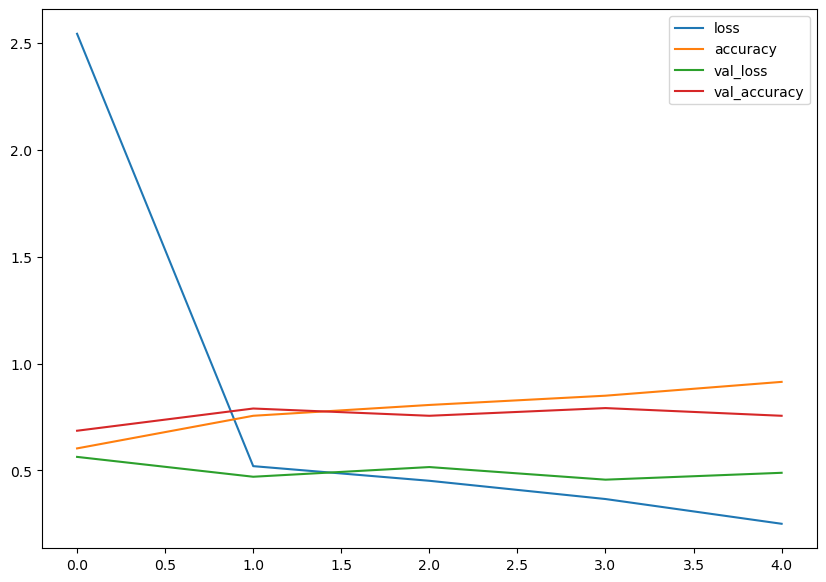

In [112]:
#017 Breaking our CNN model down part 7 Evaluating our CNN's training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [113]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot  accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


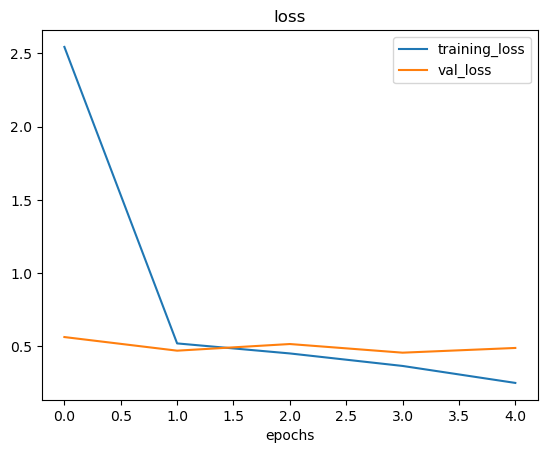

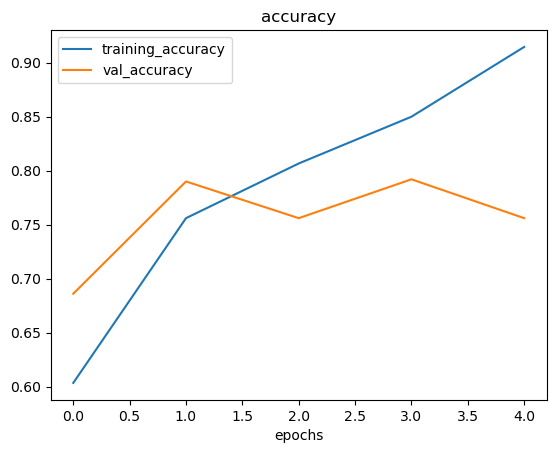

In [114]:
plot_loss_curves(history_4)

In [115]:
#018 Breaking our CNN model down part 8 Reducing overfitting with Max Pooling
# ideally the above loss curves should be very similar to each other
# adjust the model Parameters
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(244,244,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])



In [116]:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [117]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5835 - accuracy: 0.7047 - val_loss: 0.5596 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5008 - accuracy: 0.7713 - val_loss: 0.4920 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.4568 - accuracy: 0.7987 - val_loss: 0.4133 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.4266 - accuracy: 0.8107 - val_loss: 0.4178 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 7s 158ms/step - loss: 0.3980 - accuracy: 0.8227 - val_loss: 0.4108 - val_accuracy: 0.8400


In [118]:
model_5.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 121, 121, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 59, 59, 10)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 59, 59, 10)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 57, 57, 10)      

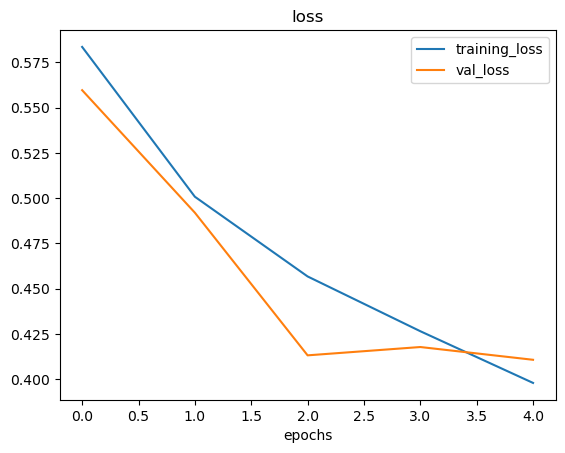

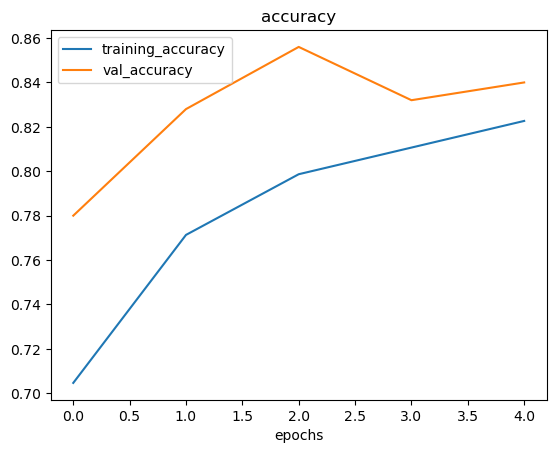

In [119]:
plot_loss_curves(history_5)

In [120]:
#019 Breaking our CNN model down part 9 Reducing overfitting with data augmentation
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True,)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [121]:
#020 Breaking our CNN model down part 10 Visualizing our augmented data
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

train_data= train_datagen.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)
test_data= test_datagen.flow_from_directory(test_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [122]:
images,labels = test_data.next()
augmentd_images,augmented_labels = train_data_augmented.next()

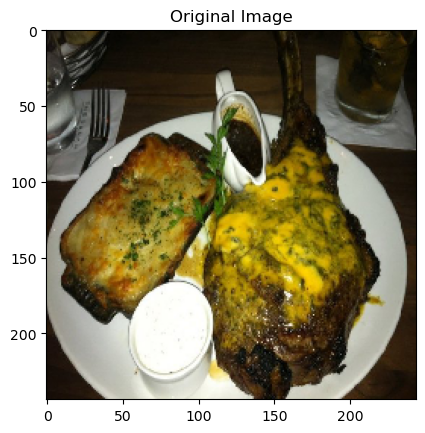

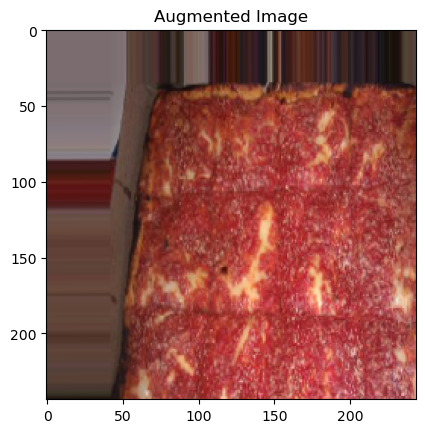

In [123]:
random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.show()
plt.imshow(augmentd_images[random_number])
plt.title("Augmented Image")
plt.show()

In [124]:
#021 Breaking our CNN model down part 11 Training a CNN model on augmented data
model_6 = Sequential([
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_6=model_6.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 20s 407ms/step - loss: 0.6554 - accuracy: 0.6113 - val_loss: 0.5338 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 19s 408ms/step - loss: 0.5305 - accuracy: 0.7480 - val_loss: 0.3748 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 19s 409ms/step - loss: 0.4899 - accuracy: 0.7607 - val_loss: 0.3603 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 19s 399ms/step - loss: 0.4913 - accuracy: 0.7693 - val_loss: 0.3768 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 19s 398ms/step - loss: 0.4841 - accuracy: 0.7820 - val_loss: 0.3574 - val_accuracy: 0.8640


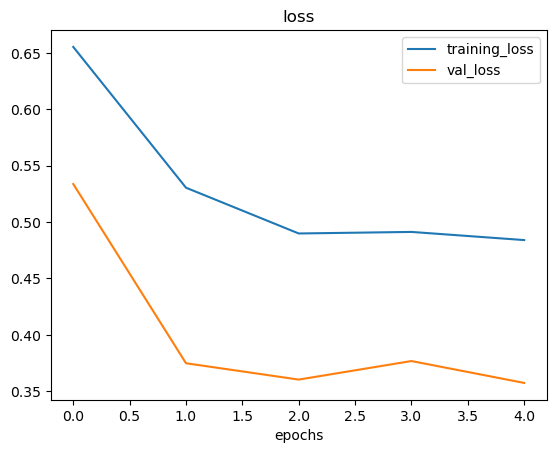

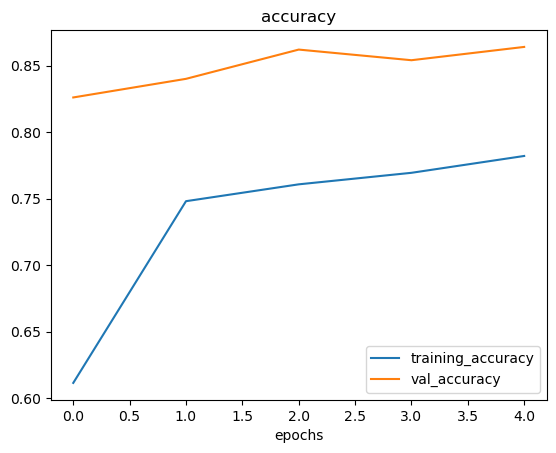

In [125]:
plot_loss_curves(history_6)

In [126]:
#022 Breaking our CNN model down part 12 Discovering the power of shuffling data
#Train a model with Shuffle = True